# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [25]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


# Study data files
mouse_metadata_df = pd.read_csv(r'C:\Users\siobh\Desktop\data\Mouse_metadata.csv')
study_results_df = pd.read_csv(r'C:\Users\siobh\Desktop\data\Study_results.csv')

# Display the data table for preview
mouse_metadata_df.columns


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [27]:
# Merge data
merged_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID')

# Check for missing values
print(merged_df.isnull().sum())

# Drop any rows with missing values (if necessary)
cleaned_df = merged_df.dropna()

# Display the data table for preview
print(cleaned_df.head())

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [28]:
# Generate summary statistics
summary_stats = cleaned_df.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    var_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', 'sem')
)
print(summary_stats)


              mean_tumor_volume  median_tumor_volume  var_tumor_volume  \
Drug Regimen                                                             
Capomulin             40.675741            41.557809         24.947764   
Ceftamin              52.591172            51.776157         39.290177   
Infubinol             52.884795            51.820584         43.128684   
Ketapril              55.235638            53.698743         68.553577   
Naftisol              54.331565            52.509285         66.173479   
Placebo               54.033581            52.288934         61.168083   
Propriva              52.322552            50.854632         42.351070   
Ramicane              40.216745            40.673236         23.486704   
Stelasyn              54.233149            52.431737         59.450562   
Zoniferol             53.236507            51.818479         48.533355   

              std_tumor_volume  sem_tumor_volume  
Drug Regimen                                      
Capomulin

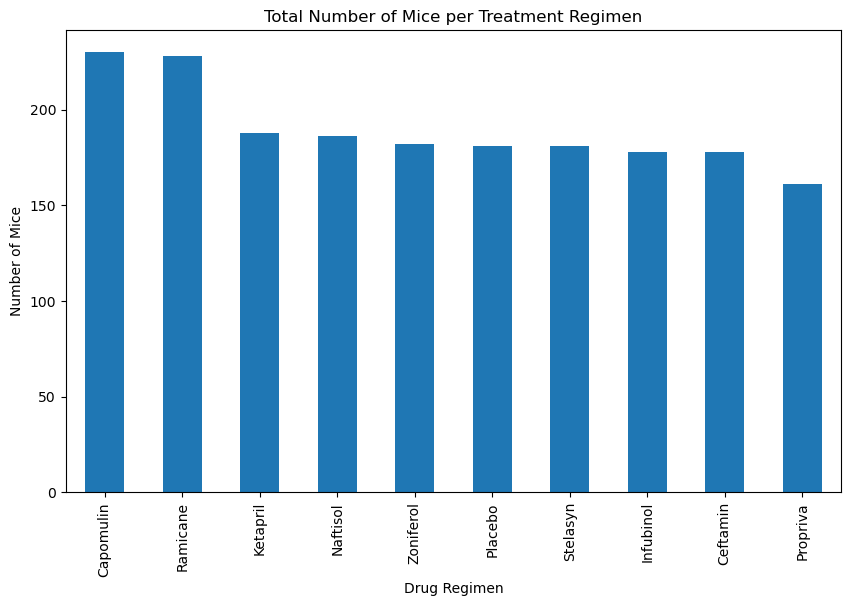

In [29]:
# Total number of mice per treatment regimen
mice_per_regimen = cleaned_df['Drug Regimen'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
mice_per_regimen.plot(kind='bar')
plt.title('Total Number of Mice per Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


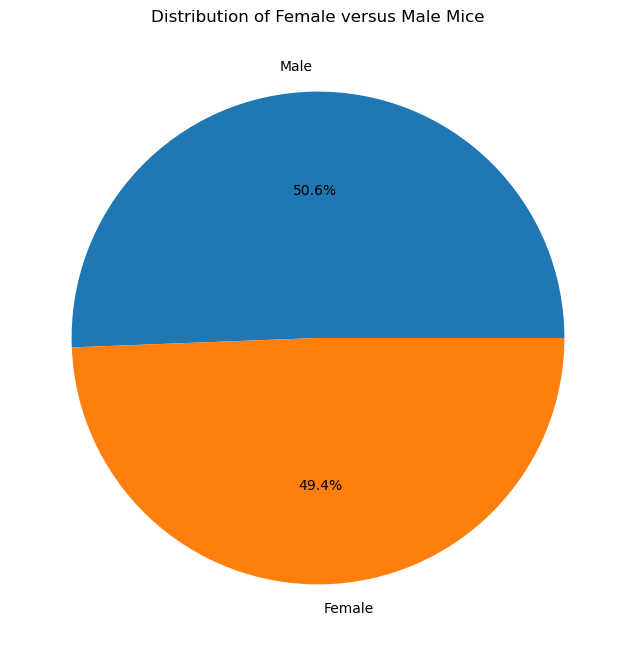

In [30]:
# Distribution of female versus male mice
sex_distribution = cleaned_df['Sex'].value_counts()

# Pie plot
plt.figure(figsize=(8, 8))
sex_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('')
plt.show()


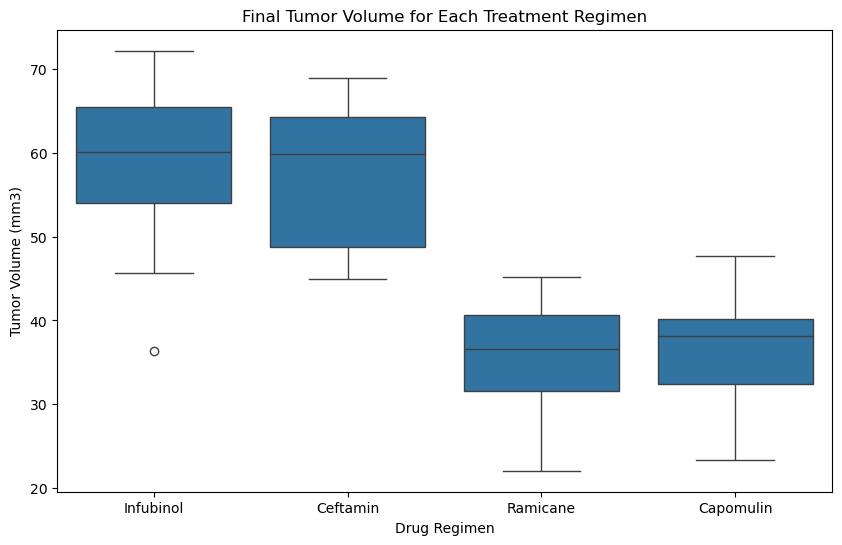

In [31]:
# Calculate final tumor volume for each mouse
final_tumor_volume = cleaned_df.groupby(['Mouse ID', 'Drug Regimen']).last()['Tumor Volume (mm3)']
final_tumor_volume = final_tumor_volume.reset_index()

# Filter for specific treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatments)]

# Generate box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=filtered_final_tumor_volume)
plt.title('Final Tumor Volume for Each Treatment Regimen')
plt.show()


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


              mean_tumor_volume  median_tumor_volume  var_tumor_volume  \
Drug Regimen                                                             
Capomulin             40.675741            41.557809         24.947764   
Ceftamin              52.591172            51.776157         39.290177   
Infubinol             52.884795            51.820584         43.128684   
Ketapril              55.235638            53.698743         68.553577   
Naftisol              54.331565            52.509285         66.173479   
Placebo               54.033581            52.288934         61.168083   
Propriva              52.322552            50.854632         42.351070   
Ramicane              40.216745            40.673236         23.486704   
Stelasyn              54.233149            52.431737         59.450562   
Zoniferol             53.236507            51.818479         48.533355   

              std_tumor_volume  sem_tumor_volume  
Drug Regimen                                      
Capomulin

## Bar and Pie Charts

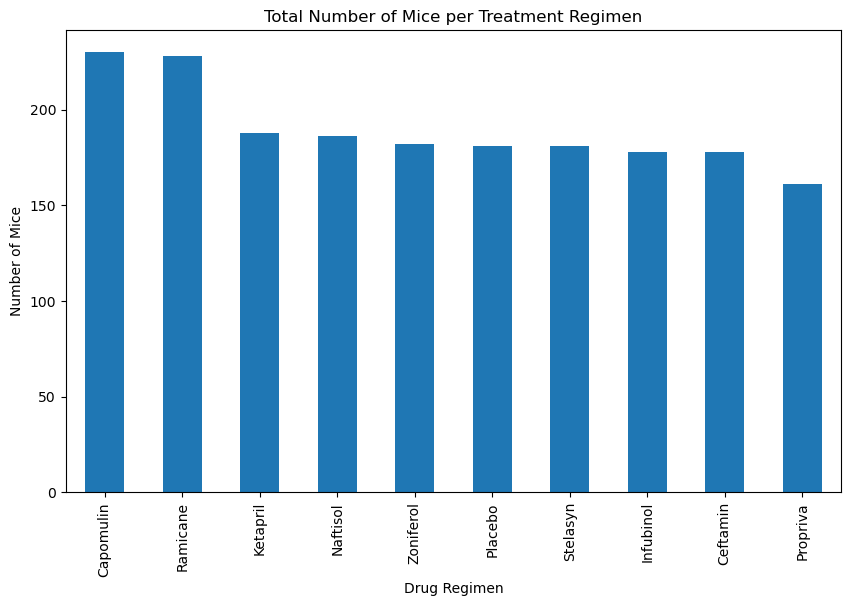

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Total number of mice per treatment regimen
mice_per_regimen = cleaned_df['Drug Regimen'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
mice_per_regimen.plot(kind='bar')
plt.title('Total Number of Mice per Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


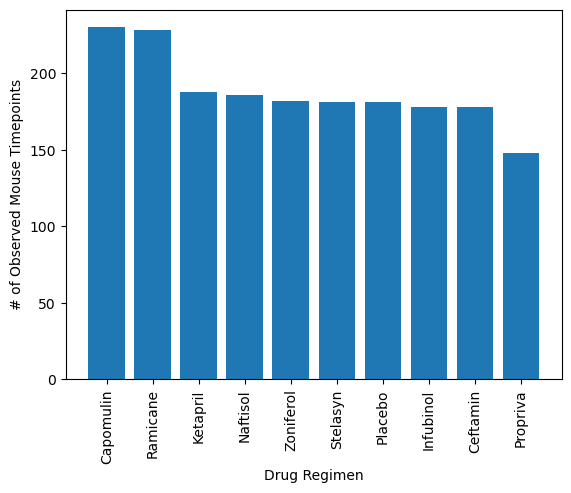

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Total number of mice per treatment regimen
mice_per_regimen = cleaned_df['Drug Regimen'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
mice_per_regimen.plot(kind='bar')
plt.title('Total Number of Mice per Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


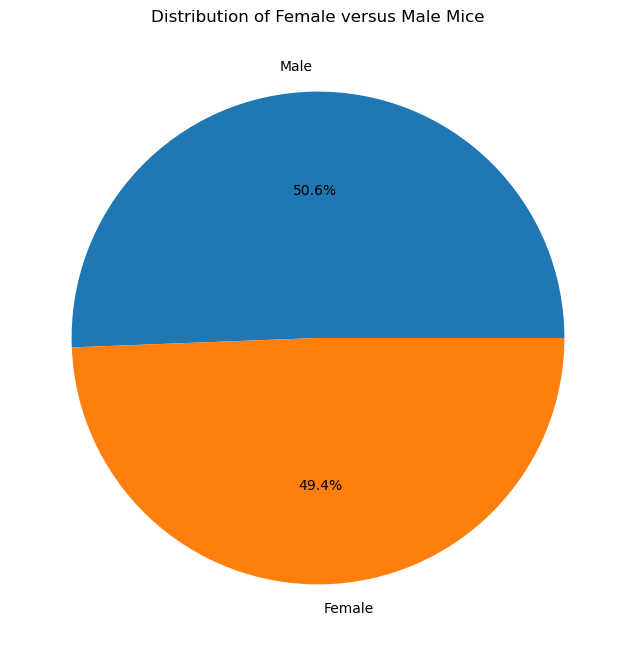

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Distribution of female versus male mice
sex_distribution = cleaned_df['Sex'].value_counts()

# Pie plot
plt.figure(figsize=(8, 8))
sex_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('')
plt.show()


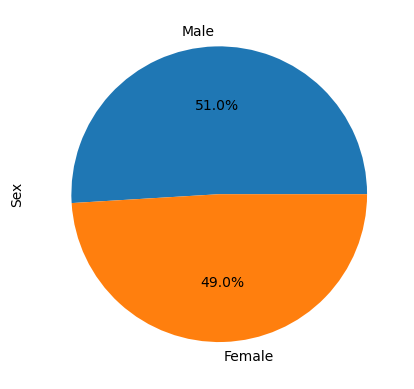

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

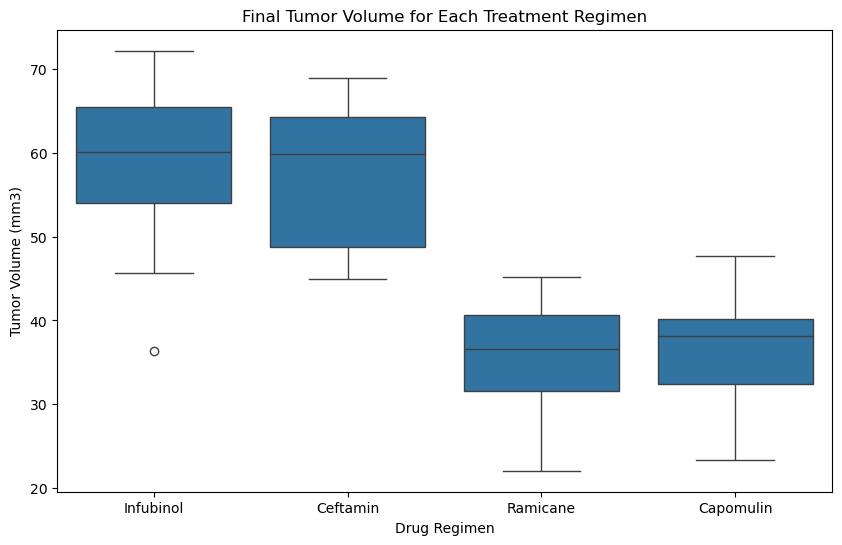

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = cleaned_df.groupby(['Mouse ID', 'Drug Regimen']).last()['Tumor Volume (mm3)']
final_tumor_volume = final_tumor_volume.reset_index()
# Start by getting the last (greatest) timepoint for each mouse
# Calculate final tumor volume for each mouse
final_tumor_volume = cleaned_df.groupby(['Mouse ID', 'Drug Regimen']).last()['Tumor Volume (mm3)']
final_tumor_volume = final_tumor_volume.reset_index()

# Filter for specific treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatments)]

# Generate box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=filtered_final_tumor_volume)
plt.title('Final Tumor Volume for Each Treatment Regimen')
plt.show()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


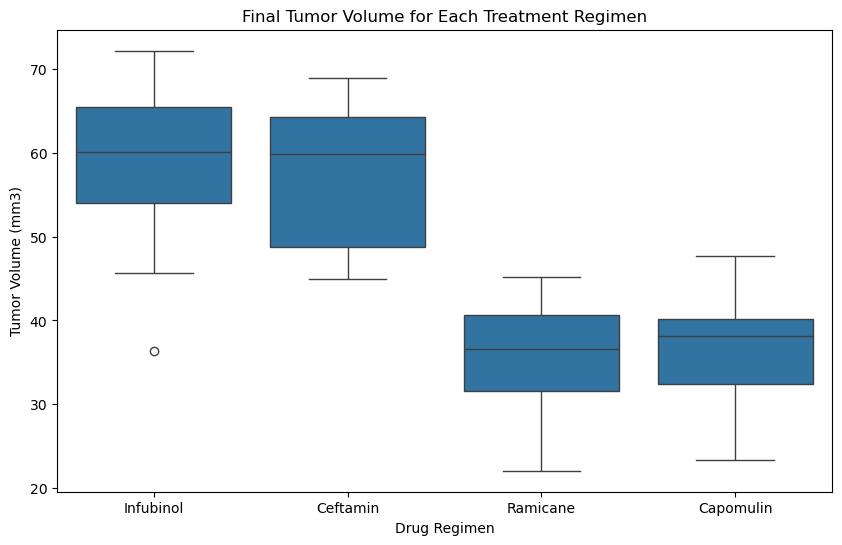

In [41]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset 
    # Determine outliers using upper and lower bounds
# Calculate final tumor volume for each mouse
final_tumor_volume = cleaned_df.groupby(['Mouse ID', 'Drug Regimen']).last()['Tumor Volume (mm3)']
final_tumor_volume = final_tumor_volume.reset_index()

# Filter for specific treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatments)]

# Generate box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=filtered_final_tumor_volume)
plt.title('Final Tumor Volume for Each Treatment Regimen')
plt.show()


In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatments)]

## Line and Scatter Plots

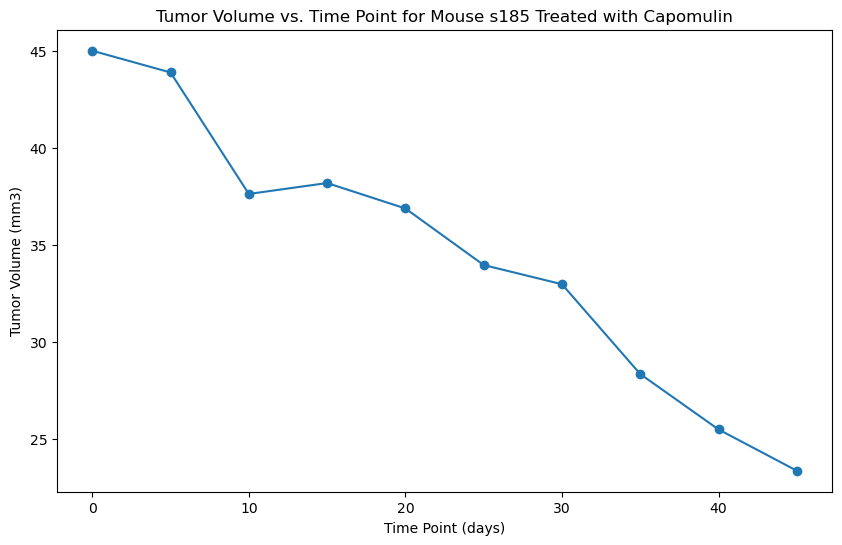

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select one mouse treated with Capomulin
capomulin_mouse = cleaned_df[cleaned_df['Mouse ID'] == 's185']

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume vs. Time Point for Mouse s185 Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [45]:
# Average tumor volume vs. mouse weight for Capomulin treatment
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
mouse_weight = capomulin_data.groupby('Mouse ID').mean()['Weight (g)']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume)
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


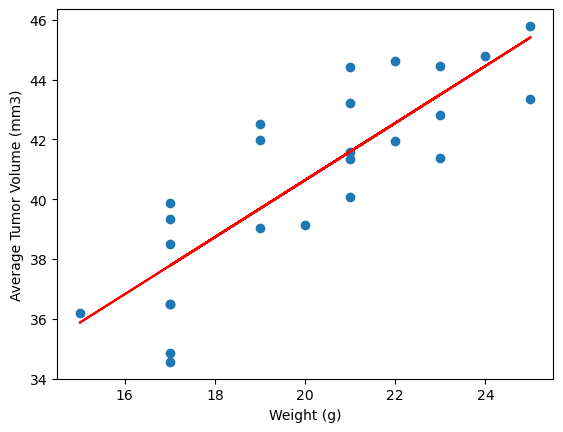

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [44]:
# Calculate correlation coefficient and linear regression model
correlation = linregress(mouse_weight, average_tumor_volume)
slope, intercept, rvalue, pvalue, stderr = correlation

# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print(f"Correlation coefficient: {rvalue}")
print(f"Regression line: y = {slope:.2f}x + {intercept:.2f}")



NameError: name 'mouse_weight' is not defined